## Comentarios y teoría

Para instalar librerías y módulos de python usamos pip, ya sea por consola: "pip install xxx", o desde el propio notebook: "!pip install xxx". Para actualizar pip: "pip install --upgrade pip".

Librerías más utilizadas con Python para el análisis de datos:
- Pandas
- Numpy
- Matplotlib
- Ipython
- Scipy
- Scikit-learn
- Keras
- Tensorflow

Data Science etapas:
1. Enmarcar el problema y hacer las preguntas adecuadas.
2. Adquirir y preparar los datos.
3. Explorar los datos.
4. Modelizar y evaluar los datos.
5. Comunicar los resultados y/o puesta en producción.

Ciclo de vida circular, se puede ir adelante y atrás según corresponda, probando y cambiando lo necesario.

Un buen gráfico, una buena visualización, es la forma más rápida y efectiva de encontrar patrones en los datos y ser capaces de obtener información y valor de estos datos.

Análisis predictivo: ser capaces de predecir el futuro en base al estudio de unos datos. Tenemos algoritmos supervisados y no supervisados, donde los supervisados son aquellos donde se usan datos anteriores para entrenar el modelo y así luego usarlo con los datos nuevos.

## Sección 1: Limpieza de datos

Si Jupyter no autocompleta por defecto, añadir la siguiente línea como primera del notebook: 
#### %config IPCompleter.greedy = True

In [43]:
# imports necesarios
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# sacar el path
mainPath = "/Users/JoseManuelBustos/Desktop/cursos_udemy/python-ml-course-master/"
fileName = "datasets/titanic/titanic3.csv"

fullPath = os.path.join(mainPath,fileName)

In [3]:
# carga de datos
data_1 = pd.read_csv(fullPath)

print("...", data_1.shape)

... (1309, 14)


In [4]:
data_1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Ver parámetros más importantes de read_csv por ejemplo para montar una función que los pueda aceptar en lista de opcionales y así usarlos o no según se requiera.

Primero y obligatorio el filepath para ver donde está el fichero.

sep = "" el separador del dataset. Por defecto asume que es la coma.

dtype = {"a":np.float64, "b":np.int32}. Cargar cada columna con un tipo de dato diferente.

header = None si no hay cabecera, o el número de fila si hay una fila en el fichero que es la cabecera. None es = 0, es la opción por defecto.

skiprows = entero o lista, filas que se saltaría al leer el fichero. Si ponemos 12, la primera fila que leería sería la 13.

names = lista con el nombre de las columnas, para asignar otros a los que tenga en el fichero.

index_col = None, número o secuencia, para indicar que alguna o algunas de las columnas forme parte del identificador de la fila o registro.

skip_black_lines = valor booleano, con True las líneas en blanco que hubiera en el fichero se saltarían en lugar de interpretarlas como NaN o valores nulos/vacíos. Por defecto viene a False.

na_filter = valor booleano, por defecto False, si viene a True elimina del dataset todos los registros que tengan algún valor NaN o vacío.



In [5]:
# nombres de las columnas del dataframe
data_1.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [7]:
# cambiar nombres columnas
# pasar a lista el nombre de las columnas
data_col_list = data_1.columns.tolist()

# podemos nosotros definir la lista de valores
data_col_list = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']

data_col_list

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']

In [8]:
# carga segunda de los datos con los nombres de las columnas que queremos
data_cols = pd.read_csv(fullPath, header=0, names=data_col_list)

data_cols.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
# ejemplo de lectura de ficheros con open, en python sin pandas
mainPath = "/Users/JoseManuelBustos/Desktop/cursos_udemy/python-ml-course-master/"
fileName = "datasets/customer-churn-model/Customer Churn Model.txt"

fullPath = os.path.join(mainPath,fileName)

# apertura con open del fichero, en modo r para lectura
data_txt = open(fullPath, "r")

In [11]:
# strip elimina espacios sobrantes al inicio y final de la línea
# split sirve para indicar por donde cortar la linea separando los elementos en un array por este elemento
linea = data_txt.readline().strip().split(",")

linea

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [69]:
# número de columnas del fichero txt cargado
num_cols = len(linea)
num_cols

21

In [70]:
# creamos un diccionario añadiendo cada columna/atributo como key y el value vacío
counter = 0
dict = {}

for col in linea:
    dict[col] = []

In [71]:
dict

{'State': [],
 'Account Length': [],
 'Area Code': [],
 'Phone': [],
 "Int'l Plan": [],
 'VMail Plan': [],
 'VMail Message': [],
 'Day Mins': [],
 'Day Calls': [],
 'Day Charge': [],
 'Eve Mins': [],
 'Eve Calls': [],
 'Eve Charge': [],
 'Night Mins': [],
 'Night Calls': [],
 'Night Charge': [],
 'Intl Mins': [],
 'Intl Calls': [],
 'Intl Charge': [],
 'CustServ Calls': [],
 'Churn?': []}

In [74]:
# recorremos cada linea del txt, y vamos añadiendo cada valor a su par key-value correspondiente del diccionario
for line in data_txt:
    values = line.strip().split(",")
    
    for i in range(len(linea)):
        dict[linea[i]].append(values[i])
    
    counter += 1

print("El dataset tiene %d filas y %d columnas"%(counter, num_cols))

El dataset tiene 3332 filas y 21 columnas


In [76]:
# pasar a dataframe el diccionario con todos los datos leidos del txt
df_txt = pd.DataFrame(dict)

df_txt.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
1,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
2,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
3,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.
4,AL,118,510,391-8027,yes,no,0,223.400000,98,37.980000,...,101,18.750000,203.900000,118,9.180000,6.300000,6,1.700000,0,False.


Hay que tener cuidado al abrir un fichero en modo "w" (escritura) ya que esto hará que dicho fichero pierda su contenido (en caso de tenerlo y querer conservarlo). Si por algún motivo se quiere agregar contenido a este es recomendable abrirlo en modo "a" (append), lo cual posicionará el cursor al final y no borrará el contenido del mismo.

In [8]:
# ejemplo de escritura de ficheros con open, en python sin pandas
mainPath = "/Users/JoseManuel/Desktop/cursos_udemy/python-ml-course-master/"
fileName = "datasets/customer-churn-model/Customer Churn Model.txt"
fileName_out = "datasets/customer-churn-model/Customer Churn Model_out.txt"

infile = os.path.join(mainPath,fileName)
outfile = os.path.join(mainPath,fileName_out)

In [9]:
# ejemplo de escritura de un fichero. Leemos el anterior y creamos otro donde el separador sea el tabulador, 
# en lugar de la coma.
with open(infile, "r") as infile1:
    with open(outfile, "w") as outfile1:
        for line in infile1:
            fields = line.strip().split(",")
            outfile1.write("\t".join(fields))
            outfile1.write("\n")

In [11]:
df_outfile = pd.read_csv(outfile, sep='\t')
df_outfile.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
# Ejemplo lectura de url externa
medals_url = "http://winterolympicsmedals.com/medals.csv"

medals_data = pd.read_csv(medals_url)
medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [28]:
# lectura de url externa con otras opciones
import csv
import urllib3

http = urllib3.PoolManager()
response = http.request('GET', 'http://winterolympicsmedals.com/medals.csv')

print("El estado de la respuesta es %d" %(response.status))

data_urllib3 = response.data

El estado de la respuesta es 200


In [33]:
#El objeto reponse contiene un string binario, así que lo convertimos a un string descodificándolo en UTF-8
str_data = data_urllib3.decode("utf-8")

#Dividimos el string en un array de filas, separándolo por intros
lines = str_data.split("\n")

#La primera línea contiene la cabecera, así que la extraemos
col_names = lines[0].split(",")
n_cols = len(col_names)

In [37]:
#Generamos un diccionario vacío donde irá la información procesada desde la URL externa
counter = 0
main_dict = {}
    
for col in col_names:
    main_dict[col] = []

#Procesamos fila a fila la información para ir rellenando el diccionario con los datos como hicimos antes
for line in lines:
    #Nos saltamos la primera línea que es la que contiene la cabecera y ya tenemos procesada
    if(counter > 0):
        #Dividimos cada string por las comas como elemento separador
        values = line.strip().split(",")
        #Añadimos cada valor a su respectiva columna del diccionario
        for i in range(len(col_names)):
            main_dict[col_names[i]].append(values[i])
    counter += 1

print("El data set tiene %d filas y %d columnas"%(counter, n_cols))

#Convertimos el diccionario procesado a Data Frame y comprobamos que los datos son correctos
df_urllib3 = pd.DataFrame(main_dict)
df_urllib3.head()

El data set tiene 2312 filas y 8 columnas


,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


In [40]:
# para guardarlo en distintos tipos de ficheros
mainpath = "/Users/JoseManuel/Desktop/cursos_udemy/python-ml-course-master/datasets/customer-churn-model/"
filename = "df_urllib3"
fullpath = os.path.join(mainpath, filename)

# Lo guardamos en CSV, en JSON o en Excel según queramos
df_urllib3.to_csv(fullpath+".csv")
df_urllib3.to_json(fullpath+".json")
df_urllib3.to_excel(fullpath+".xls")
    
print("Los ficheros se han guardado correctamente en: "+fullpath)    

Los ficheros se han guardado correctamente en: /Users/JoseManuel/Desktop/cursos_udemy/python-ml-course-master/datasets/customer-churn-model/df_urllib3


In [41]:
# leer ficheros excel
mainpath = "/Users/JoseManuel/Desktop/cursos_udemy/python-ml-course-master/datasets/titanic/"
filename = "titanic3.xls"
fullpath = os.path.join(mainpath, filename)

# el primer parámetro es el fichero a cargar, y el segundo la pestaña a leer
df_titanic = pd.read_excel(fullpath, "titanic3")

df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Análisis preliminar

In [2]:
mainPath = "/Users/JoseManuelBustos/Desktop/cursos_udemy/python-ml-course-master/"
fileName = "datasets/titanic/titanic3.csv"

fullPath = os.path.join(mainPath,fileName)

In [3]:
# carga de datos desde un csv
data = pd.read_csv(fullPath)

In [4]:
# ver las primeras filas del dataset, por defecto 5
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# ver las últimas filas del dataset, por defecto 5
data.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [5]:
# tamaño del dataset (filas, columnas)
data.shape

(1309, 14)

In [8]:
# obtener nombres de las columnas del dataset
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [10]:
# resumen de estadísticos básicos del dataset, se haría de las variables numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


In [12]:
# ver tipos de las variables
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Tratar missing values

In [ ]:
# formas de ver si hay valores perdidos o faltantes
# para ver nulos en una columna
pd.isnull(data['body'])

# no nulos en una columna
pd.notnull(data['body'])

In [22]:
# lo sacamos a un único array de datos y sumamos para ver el count de true
pd.isnull(data['body']).values.ravel().sum()

pd.notnull(data['body']).sum()

121

In [ ]:
# opción de borrar registros con valores faltantes, o la columna entera
# borraría filas/registros con valores NANs
data.dropna(axis=0)

# borraría columnas con valores NANs
data.dropna(axis=1)

# borra las filas con NANs pero si todos sus valores son NANs
data.dropna(axis=0, how='all')

# borra las filas con NANs si cualquiera de sus valores lo es
data.dropna(axis=0, how='any')

In [ ]:
# otra opción es inferir los valores faltantes, por el promedio, mediana o moda del atributo, por ejemplo
# rellena los valores NANs con un 0 en este caso, pero podría ser cualquier valor 
data = data.fillna(0)

Lo mejor es rellenar cada columna por un valor según el tipo de dato que tenga ese atributo.

Si es numérico, se debe reemplazar por otro numero, según convenga funcionalmente, puede ser por 0, por la media, la mediana...

In [ ]:
# el atributo body que es numérico le reemplazamos los NANs por un 0
data = data['body'].fillna(0)

# rellenar con media
data = data['age'].fillna(data['age'].mean())

# reemplazar con el valor anterior o el siguiente, que no sea NAN
data = data['age'].fillna(method='ffill') 
data = data['age'].fillna(method='backfill')

Variables Dummy.

Artificiales o preparadas, como por ejemplo serían atributos numéricos para sustituir a los atributos categóricos. La variable categórica "sex" que puede tener 2 valores o categorías, podríamos crear dos atributos, uno para hombre y otro mujer, y que cogieran el valor 0 o 1 dependiendo del género de la persona de esa fila.

Este tipo de variables numéricas son más adecuadas para los análisis a realizar con los datos.

In [23]:
# generación de atributos dummies a partir de otro atributo existente
dummysex = pd.get_dummies(data['sex'], prefix='sex')
dummysex.head()

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [24]:
# eliminar columna/s de un dataframe
data = data.drop(['sex'], axis = 1)

#
data = pd.concat((data, dummysex), axis = 1)
data.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


Plots y visualización de los datos

In [25]:
mainPath = "/Users/JoseManuelBustos/Desktop/cursos_udemy/python-ml-course-master/"
fileName = "datasets/customer-churn-model/Customer Churn Model.txt"

fullPath = os.path.join(mainPath,fileName)

In [46]:
data = pd.read_csv(fullPath)

data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [47]:
data.shape

(3333, 21)

In [27]:
# para que las visualizaciones se queden dentro de las propias celdas
%matplotlib inline

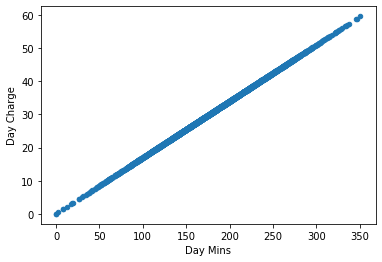

In [31]:
# scatterplot o nube de dispersión/distribución, ve rápidamente la correlación de 2 variables
data.plot(kind='scatter', x='Day Mins', y='Day Charge')

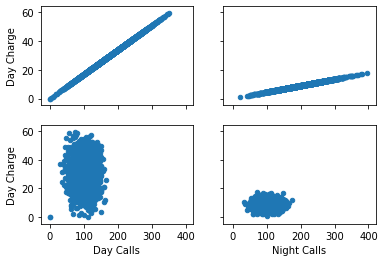

In [34]:
# montar figura para pintar varios scatter plots en la misma celda
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)

data.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
data.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[0][1])
data.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[1][0])
data.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])

In [36]:
# guardar en disco
figure.savefig("scatterplot_ejemplo.png")

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

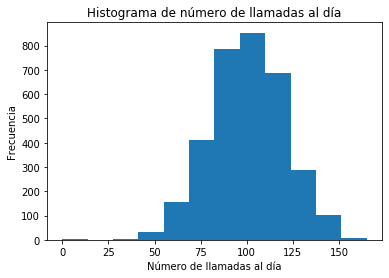

In [40]:
# histograma de frecuencias
plt.hist(data['Day Calls'], bins = 12)
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma de número de llamadas al día')

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

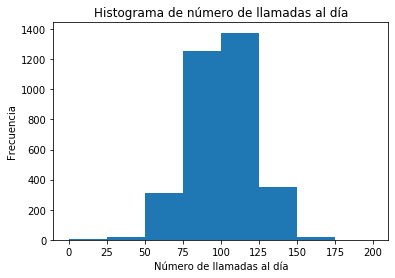

In [41]:
plt.hist(data['Day Calls'], bins = [0,25,50,75,100,125,150,175,200])
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma de número de llamadas al día')

Para saber el número de divisiones para el histograma, lo más correcto es utilizar el siguiente método: 1+log2(tamaño muestra)

Text(0.5, 1.0, 'Histograma de número de llamadas al día')

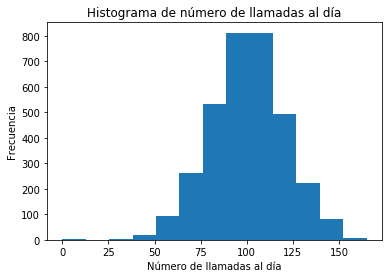

In [49]:
# usamos este método para calcular los bins de forma correcta. Debe pasarse a entero
plt.hist(data['Day Calls'], bins = int(np.ceil(1+np.log2(3333))))
plt.xlabel('Número de llamadas al día')
plt.ylabel('Frecuencia')
plt.title('Histograma de número de llamadas al día')

Text(0.5, 1.0, 'Boxplot de número de llamadas al día')

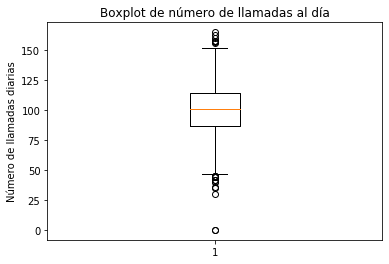

In [51]:
# boxplot
plt.boxplot(data['Day Calls'])
plt.ylabel('Número de llamadas diarias')
plt.title('Boxplot de número de llamadas al día')

In [52]:
# describe de un sólo atributo del dataframe
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [54]:
# ver el rango intercuartílico de un atributo del dataframe, que sería el tercer cuartil - el primer cuartil, 
# estos datos corresponden a la caja dibujada con el boxplot.
IQR = data['Day Calls'].quantile(0.75) - data['Day Calls'].quantile(0.25)
IQR

27.0

In [55]:
# los datos outliers serían los que están por encima del tercer cuartil + 1.5*rango intercuartílico
data['Day Calls'].quantile(0.75) + 1.5*IQR

# y también los que estén por debajo del primer cuartil - 1.5*rango intercuartílico
data['Day Calls'].quantile(0.25) - 1.5*IQR

46.5